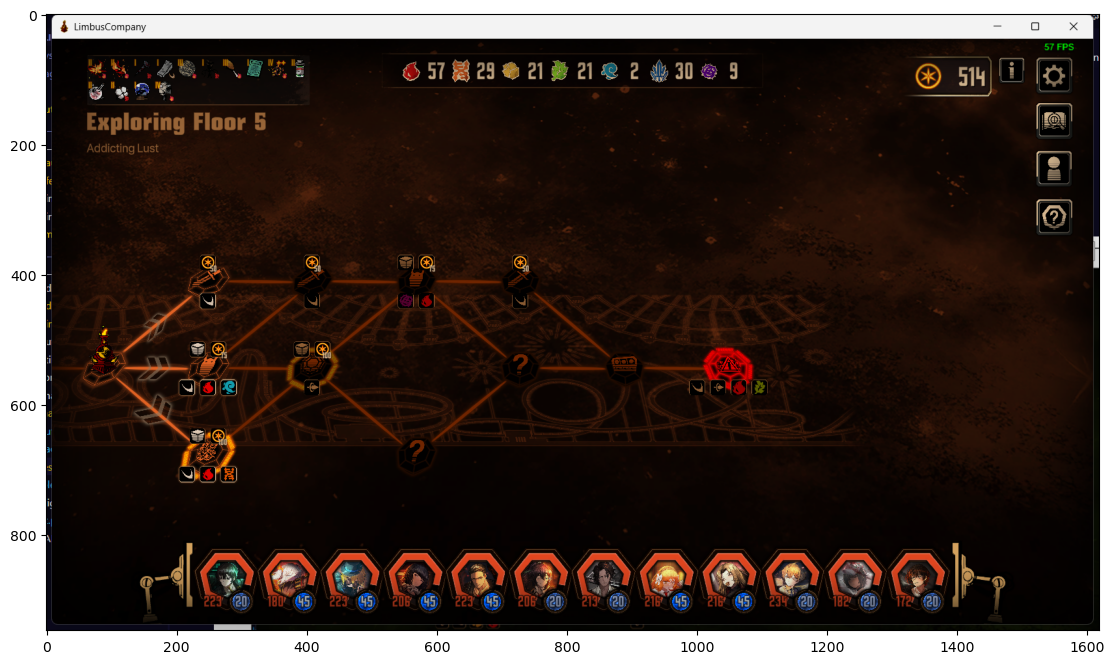

In [1]:
from limbus.data import Config
from limbus.dungeon import Dungeon
import matplotlib.pyplot as plt
import cv2 as cv

dir = "..\images\encounter"
dungeon_map = "..\images\\train_2.png"
map = cv.imread(dungeon_map)
map = cv.cvtColor(map, cv.COLOR_BGR2RGB)

cfg = Config(210)
md = Dungeon(map, config=cfg, encounters_dir=dir)

nodes = md.map()
lines = md.find_lines()

plt.figure(figsize=(16, 8))
plt.imshow(md.dungeon)
plt.show()

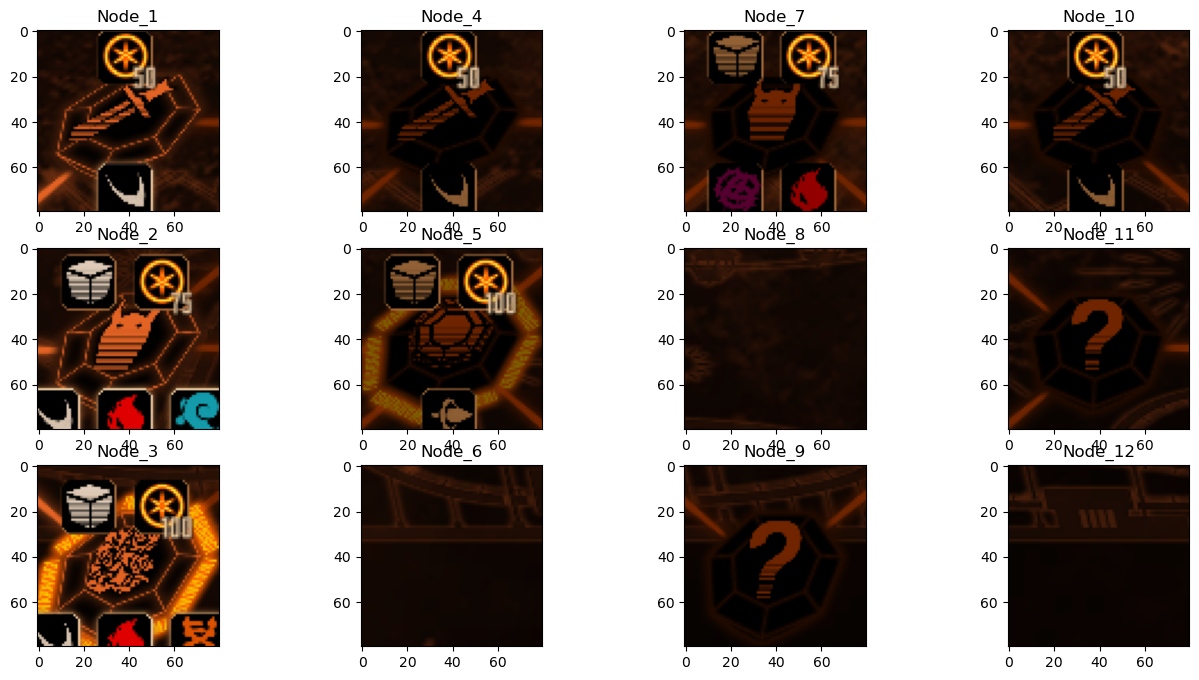

In [2]:
fig, axes = plt.subplots(3, 4, figsize=(16,8))
index = 0
for i in range(4):
    for j in range(3):
        node = nodes[index]
        axes[j,i].set_title(node.name)
        axes[j,i].imshow(md.dungeon[node.y:node.y+node.height, node.x:node.x+node.width], cmap='gray')
        index = index + 1
        
plt.show()

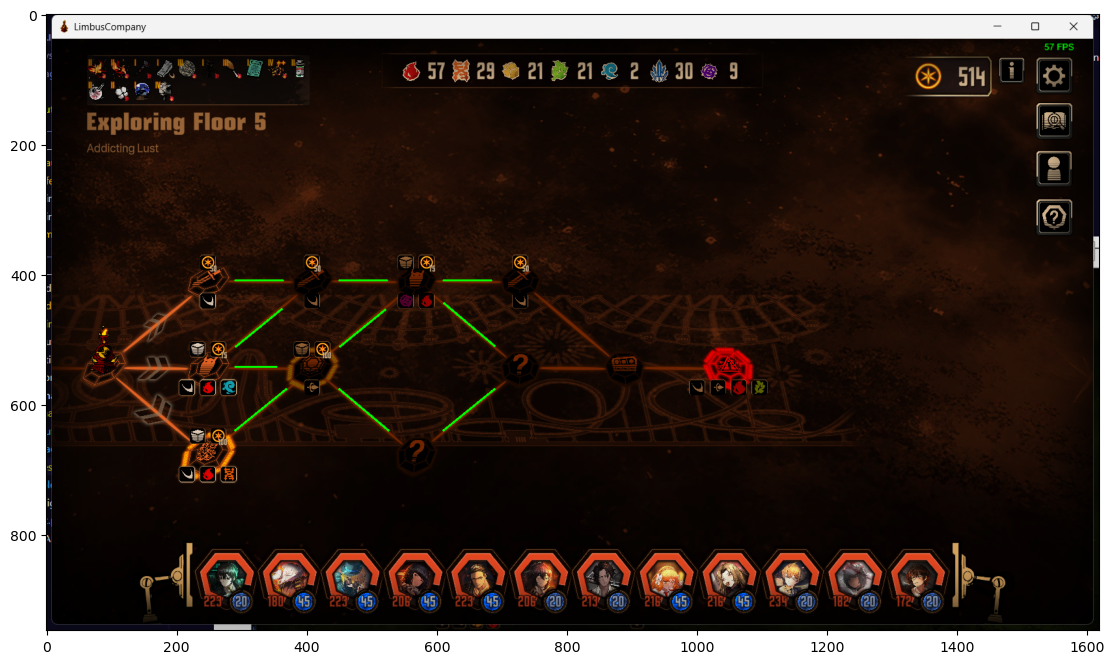

In [3]:
for line in lines:
    for x1, y1, x2, y2 in line:
        cv.line(map, (x1,y1), (x2,y2), (0,255,0), 2)

plt.figure(figsize=(16, 8))
plt.imshow(map)
plt.show()

In [5]:
md.map_connections()
path = md.crawl()

print(f"Shortest/Most rewarding path: {path}")

Shortest/Most rewarding path: [2, 5, 9, 11]
